# Desafio 1

## Parte 1

1- ¿Cuál es la diferencia entre el aprendizaje supervisado y el aprendizaje no supervisado?

En el aprendizaje supervisado tu entregas al modelo informacion de los resultados a obtener, en cambio en el no supervisado esta informacion no se entrega

2- En la industria de la salud, a menudo se utiliza el machine learning para predecir la probabilidad de enfermedades o condiciones médicas en función de diferentes variables de entrada, como síntomas, antecedentes médicos y factores de estilo de vida. Imagina que tienes un conjunto de datos que contiene información de pacientes y su diagnóstico (enfermo/no enfermo). ¿Qué tipo de aprendizaje utilizarías para construir un modelo predictivo?

Se usa supervisado ya que se tiene informacion del diagnostico

3- ¿Por qué razón es necesario dividir el set de datos en 2 set de datos al momento de realizar algún modelamiento supervisado? ¿Cuáles son los 2 set de datos y cúal es la función de cada uno?

Se divide en 2 ya que uno es usado para entrenamiento y el otro es usado para evaluacion del modelo, asi se asegura detectar errores como overfitting o underfitting al probar resultados con el mismo set de datos.

4- ¿Cuál es la principal diferencia en el modelamiento de la regresión lineal para un enfoque estadístico y un enfoque de aprendizaje de máquinas?

Nose

5. Escoge una industria de acuerdo a su área de interés, rubro de trabajo o área de estudios (por ejemplo, salud, telecomunicaciones, retail, medioambiente, etc).
Menciona al menos 1 aplicación en esa industria de:
Si consideramos el area de la banca podemos señalar
a. Aprendizaje Supervisado (Clasificación)
R: Evaluacion de creditos en clientes.
b. Aprendizaje Supervisado (Regresión)
Evaluacion de ganancias del negocio en proximos años.
c. Aprendizaje No Supervisado (Clustering)
R: Segregacion y clustering de clientes. 
d. Aprendizaje No Supervisado (Reducción de dimensionalidad)
R: Puede ser usado para cualquiera de los objetivos anteriores para reducir el numero de variables que se van a trabajar

## Parte 2

6- Carga los datos de la base data_housing.csv e importa las librerías necesarias para cargar los datos en un DataFrame, manipularlos, hacer cálculos, analizarlos y construir modelos de regresión lineal. Utiliza Pandas, NumPy y Scikit-learn.

In [1]:
import pandas as pd
import numpy as np

import missingno as msngo
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
INPUT_PATH = "Data/data-housing.xlsx"

In [3]:
df = pd.read_excel(INPUT_PATH)
df.head()

,price,area,bedrooms,bathrooms,stories,guestroom,hotwaterheating,airconditioning,parking
0,13300000,7420,4,2,3,no,no,yes,2
1,12250000,8960,4,4,4,no,no,yes,3
2,12250000,9960,3,2,2,no,no,no,2
3,12215000,7500,4,2,2,no,no,yes,3
4,11410000,7420,4,1,2,yes,no,yes,2


7- Genera un informe de calidad de datos de la base. Analiza la existencia de datos atípicos, extraños o nulos. Además, analiza las posibles correlaciones entre las variables.

In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


<Axes: >

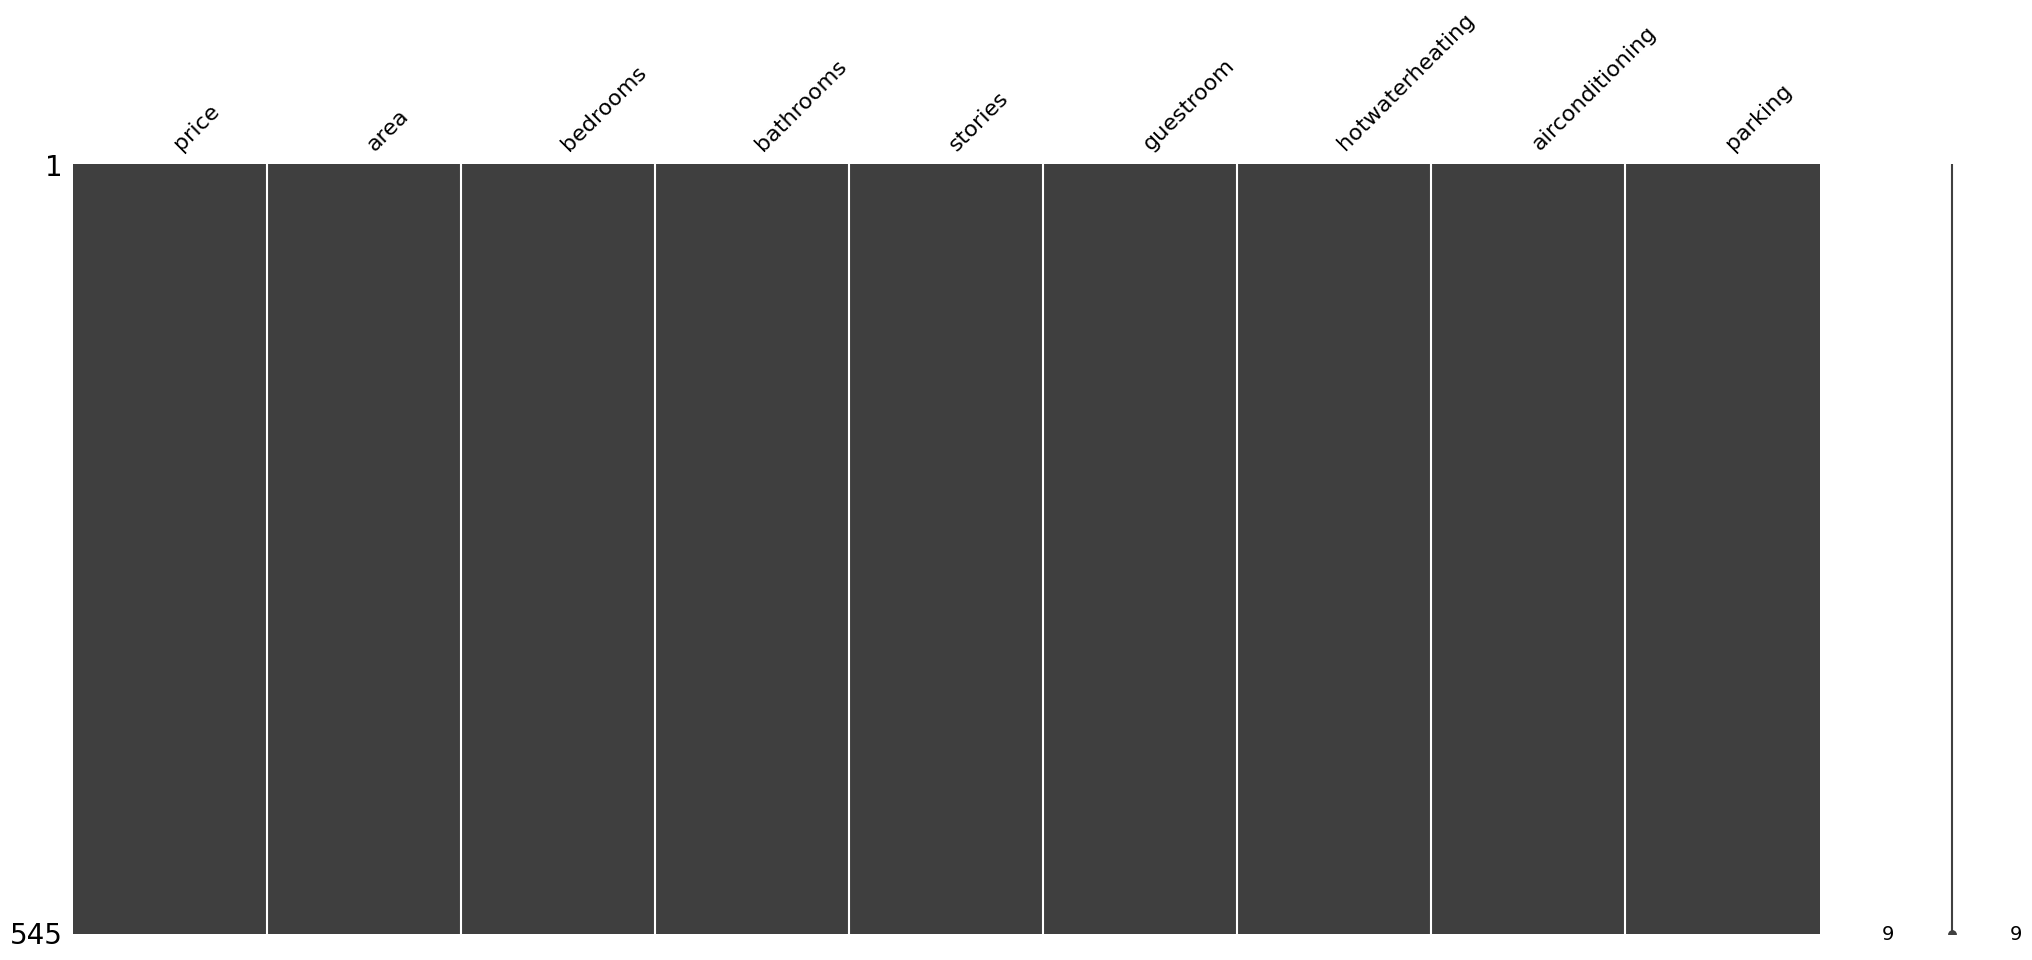

In [5]:
msngo.matrix(df)

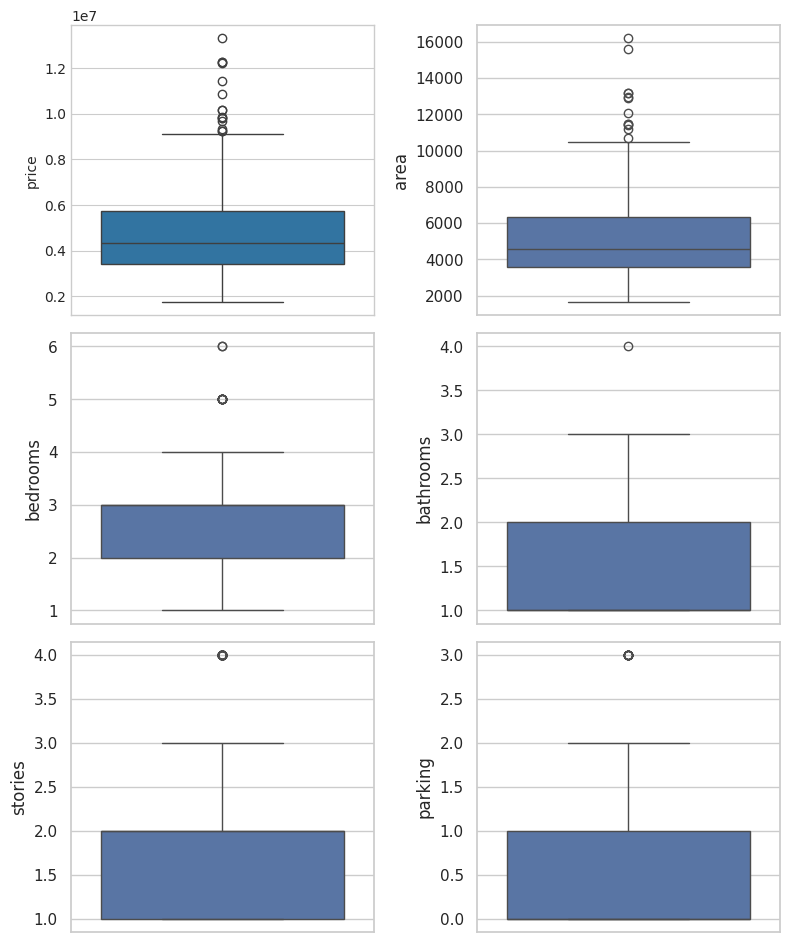

In [6]:
numeric_columns = df.select_dtypes(include=np.number).columns

plt.rcParams["figure.figsize"] = (8, 25)
plt.style.use('seaborn-v0_8-whitegrid')
for column in numeric_columns:
    plt.subplot(8,2, list(numeric_columns).index(column)+1)
    sns.set(style='whitegrid')
    sns.boxplot(y=column, data=df)
    plt.ylabel(column)
plt.tight_layout()

Se observan outliers en el precio, estos se removeran de la muestra

In [7]:
def drop_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return not_outliers
df['price'] = drop_outliers_IQR(df.price)
df['area'] = drop_outliers_IQR(df.area)
df = df.dropna()

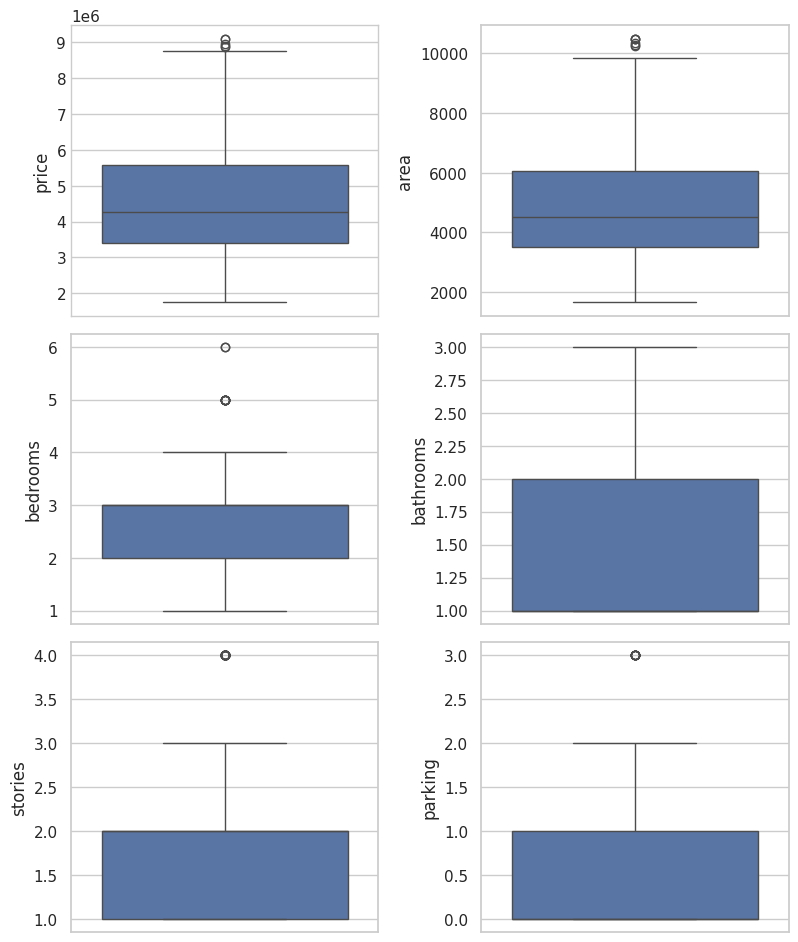

In [8]:
numeric_columns = df.select_dtypes(include=np.number).columns

plt.rcParams["figure.figsize"] = (8, 25)
plt.style.use('seaborn-v0_8-whitegrid')
for column in numeric_columns:
    plt.subplot(8,2, list(numeric_columns).index(column)+1)
    sns.set(style='whitegrid')
    sns.boxplot(y=column, data=df)
    plt.ylabel(column)
plt.tight_layout()

In [9]:
plt.rcParams["figure.figsize"] = (10, 6)

Con esto se puede observar que no se tienen nulos en la muestra de datos, y que si bien existen outliers, estos se pueden observar mas en el precio y el en area de las casas

In [10]:
df['guestroom'] = df['guestroom'].apply(lambda x: 1 if x == 'yes' else 0)
df['hotwaterheating'] = df['hotwaterheating'].apply(lambda x: 1 if x == 'yes' else 0)
df['airconditioning'] = df['airconditioning'].apply(lambda x: 1 if x == 'yes' else 0)
df.head()

,price,area,bedrooms,bathrooms,stories,guestroom,hotwaterheating,airconditioning,parking
15,9100000.0,6000.0,4,1,2,0,0,0,2
16,9100000.0,6600.0,4,2,2,1,0,1,1
17,8960000.0,8500.0,3,2,4,0,0,1,2
18,8890000.0,4600.0,3,2,2,1,0,1,2
19,8855000.0,6420.0,3,2,2,0,0,1,1


<Axes: >

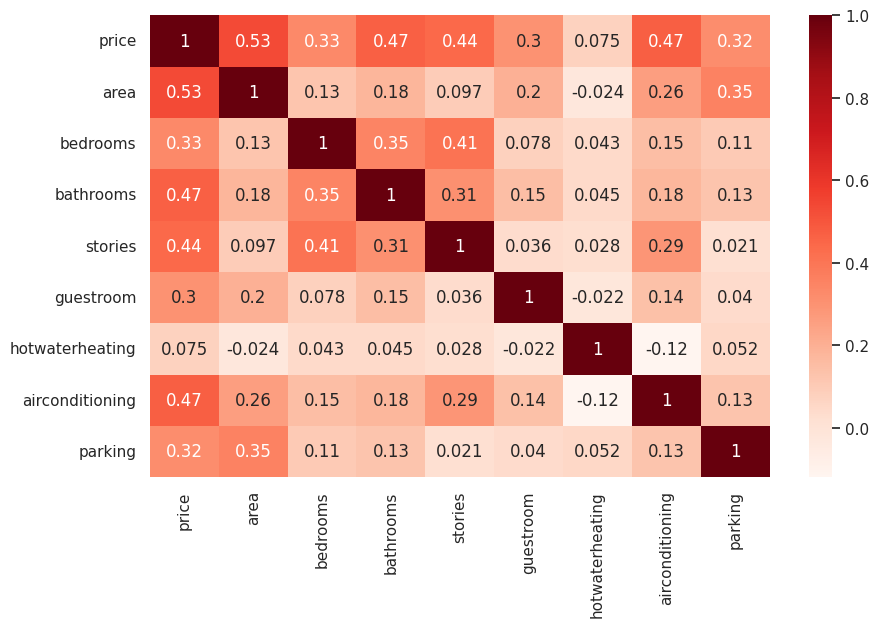

In [11]:
sns.heatmap(df.corr(), annot=True, cmap='Reds')

Se observa una posible correlacion entre el area y los baños con el precio, por lo que se tomaran estas variables para generar el modelo

8- Genera un modelo de regresión lineal. Para ello:

    a. Importa el estimador de regresión lineal de Scikit-learn.
    b. Divide los datos (80% train y 20% test)
    c. Crea una instancia del modelo de regresión lineal.
    d. Ajusta el modelo utilizando los datos de entrenamiento.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2 , train_size = 0.8)

In [13]:
columns_x = list(df.columns)
columns_x.remove('price')
columns_x = ['area', 'bathrooms']
columns_y = 'price'

In [14]:
reg = LinearRegression().fit(train[columns_x], train[columns_y])

9- Evalúa el modelo. Para ello:

    a. Utiliza los datos de entrenamiento y calcula métricas de evaluación, como el error cuadrado medio (MSE) o el coeficiente de determinación (R^2). Grafica los coeficientes.

In [15]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(test[columns_y], reg.predict(test[columns_x]))
r2 = r2_score(test[columns_y], reg.predict(test[columns_x]))
mae = mean_absolute_error(test[columns_y], reg.predict(test[columns_x]))
mse, r2, mae

(1318460977947.591, 0.5005835579417963, 922890.8621139402)

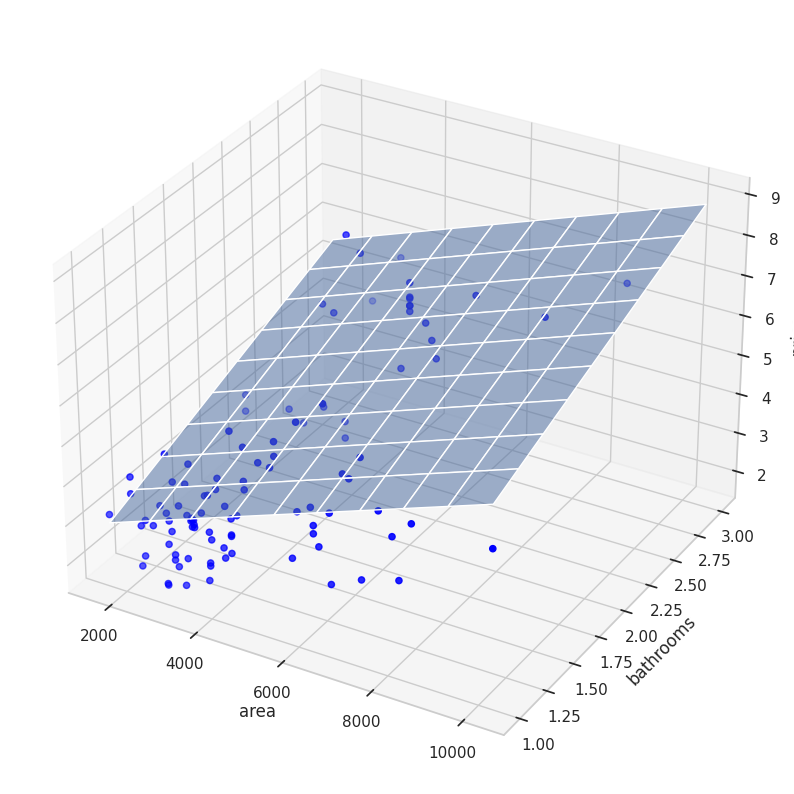

In [16]:
plt.rcParams["figure.figsize"] = (10, 25)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test['area'], test['bathrooms'], test['price'], color='blue')

# Crear un meshgrid para el plano
x = np.linspace(test['area'].min(), test['area'].max(), num=10)
y = np.linspace(test['bathrooms'].min(), test['bathrooms'].max(), num=10)
x, y = np.meshgrid(x, y)

# Calcular los valores z (Autos Producidos) del plano
z = reg.intercept_ + reg.coef_[0] * x + reg.coef_[1] * y

# Graficar el plano
ax.plot_surface(x, y, z, alpha=0.5)
ax.set_xlabel('area')
ax.set_ylabel('bathrooms')
ax.set_zlabel("price")
plt.show()

    b. Utiliza los datos de prueba para realizar predicciones con el modelo entrenado, y evalúa el rendimiento del modelo comparando las predicciones con los valores reales.

In [24]:
def trunc(x):
    return np.trunc(x)
vf = np.vectorize(trunc)

pd.DataFrame({'test_values': np.array(test['price']), 'predict_values' : vf(reg.predict(test[columns_x])) })

,test_values,predict_values
0,4515000.0,3644770.0
1,3500000.0,4594872.0
2,2975000.0,3997441.0
3,6440000.0,8224961.0
4,5866000.0,4172604.0
...,...,...
99,3465000.0,3492284.0
100,3710000.0,3697162.0
101,4900000.0,4759087.0
102,3500000.0,3703418.0
